<a href="https://colab.research.google.com/github/VictoKu1/API_Security_Research/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cisco - Ariel University API Security Detection Challenge 2023


---



---



## Dataset 1 (Task 1)

The most basic API traffic containing the least number of attacks and endpoints. Will basically enable to have a soft start. 

```
Dataset 1 baseline score:

                   precision    recall  f1-score   support

    Benign          0.95715   0.93922   0.99792       480
    Malware         0.99799   0.94129   0.96881       528
    
    accuracy                            0.96825      1008
    macro avg       0.96860   0.96960   0.96824      1008
    weighted avg    0.97000   0.96825   0.96827      1008

```

[Link to the Dataset 1](https://drive.google.com/file/d/15MxHRAdwPXCENACwn8wLMkb98ZCjDeh6/view?usp=share_link)

## Baseline code

### Imports and global settings

In [437]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle

# from ipywidgets import widgets
# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1   # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [438]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)
df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

In [439]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.Host             4282 non-null   object
 1   request.headers.User-Agent       4282 non-null   object
 2   request.headers.Accept-Encoding  4282 non-null   object
 3   request.headers.Accept           4282 non-null   object
 4   request.headers.Connection       4282 non-null   object
 5   request.headers.Accept-Language  4282 non-null   object
 6   request.headers.Sec-Fetch-Site   4282 non-null   object
 7   request.headers.Sec-Fetch-Mode   4282 non-null   object
 8   request.headers.Sec-Fetch-User   4282 non-null   object
 9   request.headers.Sec-Fetch-Dest   4282 non-null   object
 10  request.headers.Set-Cookie       4282 non-null   object
 11  request.headers.Date             4282 non-null   object
 12  request.method                   4

### Preprocessing Data

In [440]:
list_of_nan_for_more_than_90 = []

for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

Column response.headers.Location has 3881 NaN values, which is 90.64%, and has 2 unique values
Column request.headers.Content-Length has 3983 NaN values, which is 93.02%, and has 1 unique values
Column response.headers.Set-Cookie has 3983 NaN values, which is 93.02%, and has 1 unique values


In [441]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN

for column in df.columns[df.isna().any()].tolist():
    df[column] = df[column].fillna('None')

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",None,None,None,None,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,None,None,None,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,LOG4J,Malware


In [442]:
from collections import Counter

# Detect columns that have the 
# same value for all rows and print them
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection
request.headers.Sec-Fetch-User
request.body


In [443]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via 
# label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Host',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     'request.headers.Sec-Fetch-User',
                     ]

In [444]:
# Main preprocessing function -
# iterate over all of the chosen columns
# and run some feature extraction models

def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for j in SIMPLE_HEADERS:
        df[j] = le.fit_transform(df[j])

    # Run HashingVectorized on the chosen features
    for j in COMPLEX_HEADERS:
        newHVec = h_vec.fit_transform(df[j])
        df[j] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for j in COLUMNS_TO_REMOVE:
        df.drop(j, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,0,-0.632456,0,1,0,0,0,-0.786334,0,0.000000,0,-1.0,200,0.000000,-1.000000,-1.0,-1.0,-1.0,Directory Traversal,Malware
1,0,-0.632456,0,0,0,0,0,-0.786146,0,0.000000,4,-1.0,404,0.000000,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
2,0,-0.800000,0,0,0,0,0,-0.751646,0,1.000000,0,-1.0,200,0.436436,-0.408248,-1.0,-1.0,-1.0,Cookie Injection,Malware
3,0,-0.516398,0,1,0,0,0,-0.716002,0,0.894427,4,-1.0,404,0.577350,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
4,0,0.377964,0,0,0,0,29,-0.691095,0,0.000000,4,-1.0,404,0.000000,-1.000000,-1.0,-1.0,-1.0,LOG4J,Malware


In [445]:
# Memory check
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   request.headers.Host             4282 non-null   int32  
 1   request.headers.User-Agent       4282 non-null   float64
 2   request.headers.Accept-Encoding  4282 non-null   int32  
 3   request.headers.Accept-Language  4282 non-null   int32  
 4   request.headers.Sec-Fetch-Site   4282 non-null   int32  
 5   request.headers.Sec-Fetch-Mode   4282 non-null   int32  
 6   request.headers.Sec-Fetch-Dest   4282 non-null   int32  
 7   request.headers.Set-Cookie       4282 non-null   float64
 8   request.method                   4282 non-null   int32  
 9   request.url                      4282 non-null   float64
 10  response.status                  4282 non-null   int32  
 11  response.headers.Content-Type    4282 non-null   float64
 12  response.status_code

In [446]:
# Choose features
features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')

print(features_list)

# Check type
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.Host                 int32
request.headers.User-Agent         float64
request.headers.Accept-Encoding      int32
request.headers.Accept-Language      int32
request.headers.Sec-Fetch-Site       int32
request.headers.Sec-Fetch-Mode       int32
request.headers.Sec-Fetch-Dest       int32
request.headers.Set-Cookie         float64
request.method                       int32
request.url                        float64
response.status                      int32
response.headers.Content-Type      float64
response.status_code                 int64
response.body                      float64
request.headers.Cookie             float64
response.headers.Location          float64
request.headers.Content-Length     float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: object

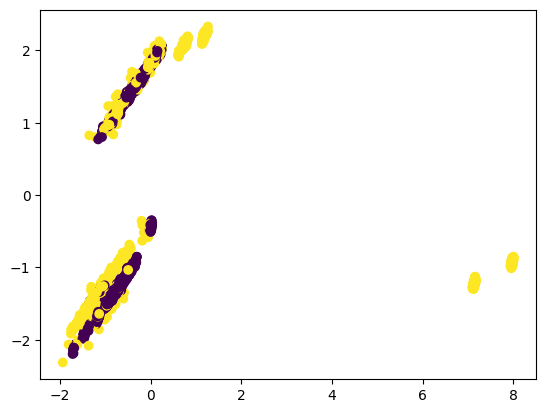

In [447]:
ss = StandardScaler()
pca = PCA(n_components=2)
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

plt.scatter(x_after_pca_in_2D[:, 0], 
            x_after_pca_in_2D[:, 1], 
            c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [448]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
    )

As we can see we can compress the data into 14 components without losing any information.

## Train Test Split

*   x_Train and y_Train will be used for _Train_
*   x_test and y_test.T will be used for _Test_


In [449]:
# Convert the feature list to a numpy array
x = df[features_list]

# This column is the desired prediction we'll use to train our model
y = np.stack(df[test_type])

# Split the dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.1765, 
                                                    random_state=42, 
                                                    stratify=y)

# Print the resulted datasets 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Count differences
counter = Counter(y)
counter

(3526, 18) (3526,)
(756, 18) (756,)


Counter({'Malware': 2264, 'Benign': 2018})

In [450]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

pca = PCA(8)
pca.fit(x_train)

x_train_pca_real = pca.transform(x_train)
x_train_pca = x_train

x_test_pca_real = pca.transform(x_test)
x_test_pca = x_test

In [451]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importance")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

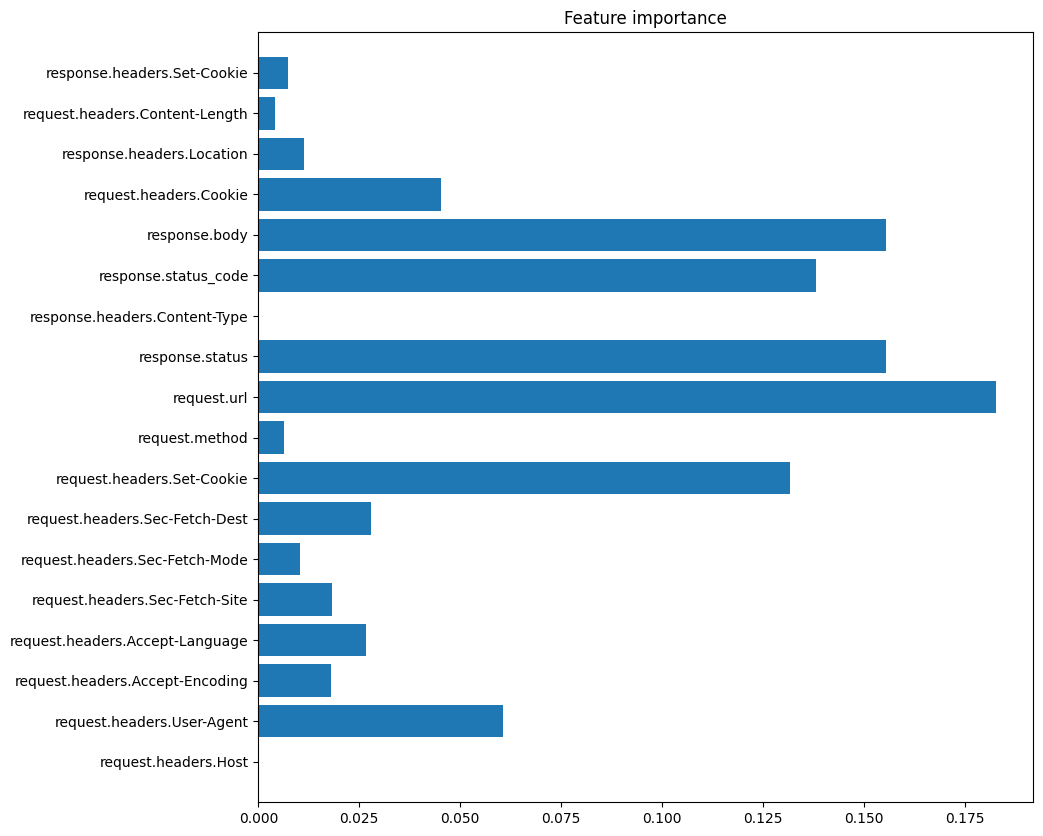

In [452]:
# Feature selection with Random Forest Classifier
rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest
plot_feature_importance(rfc_fs)

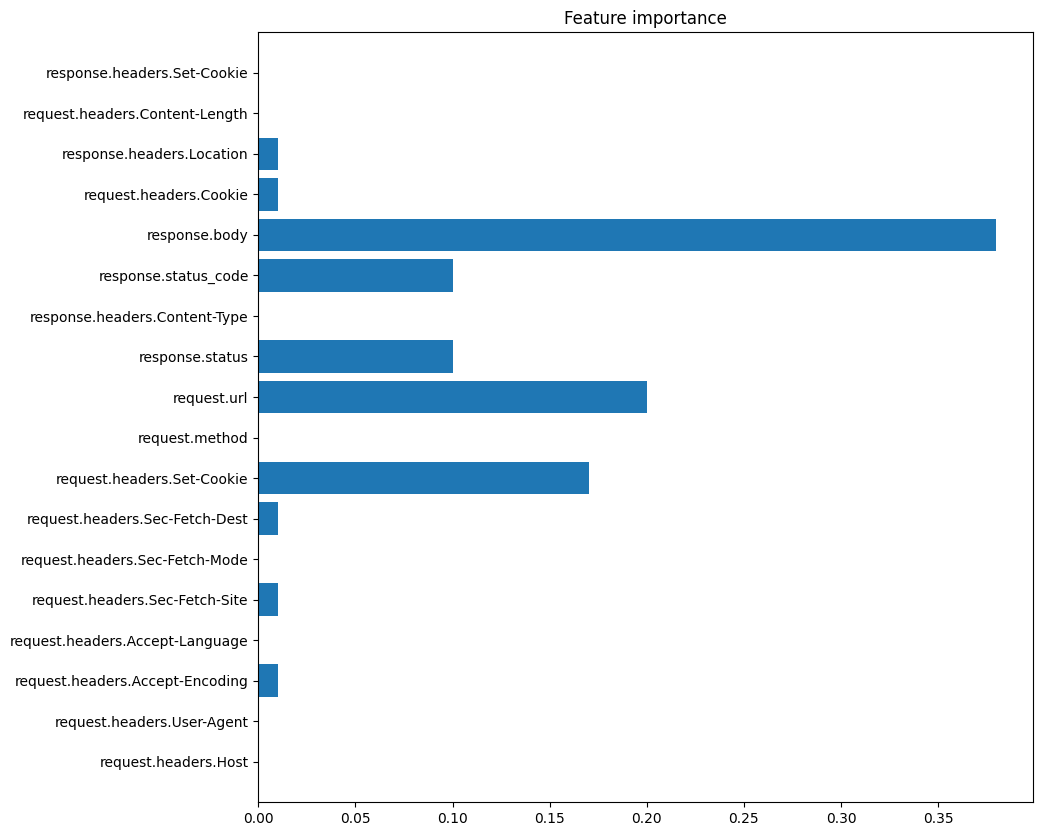

In [453]:
# Feature selection with AdaBoost Classifier
abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest
plot_feature_importance(abc_fs)

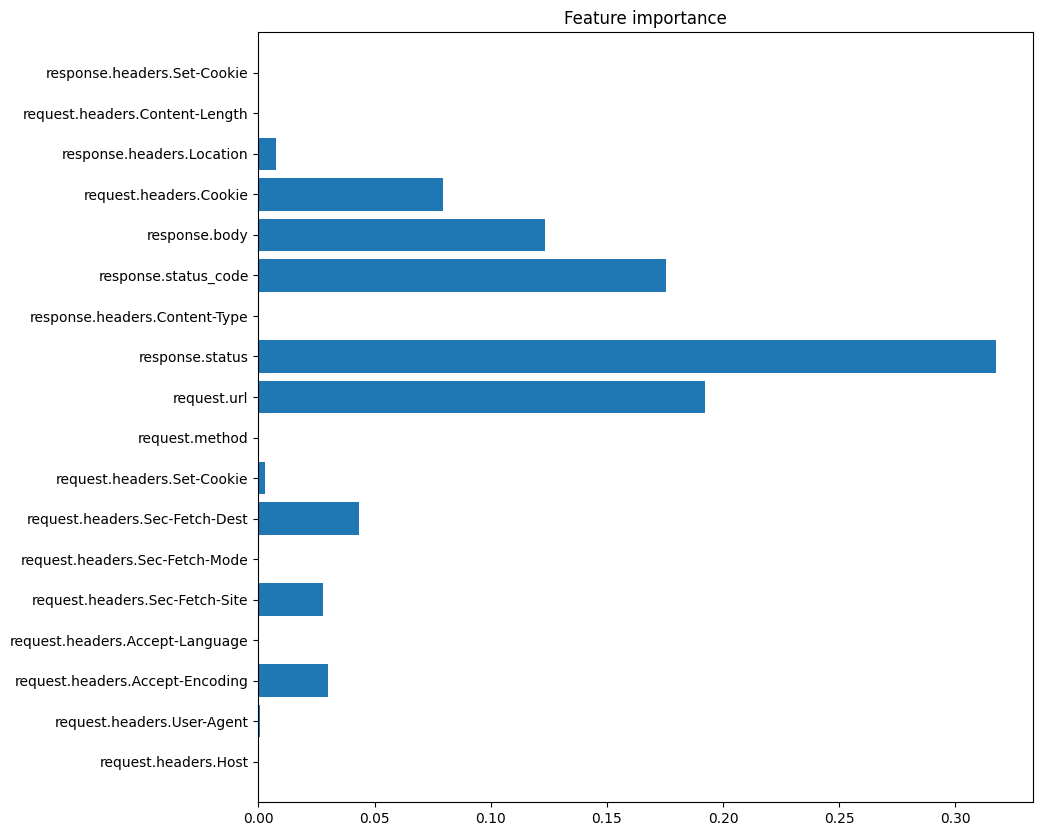

In [454]:
# Feature selection with Gradient Boosting Classifier
gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest
plot_feature_importance(gbc_fs)

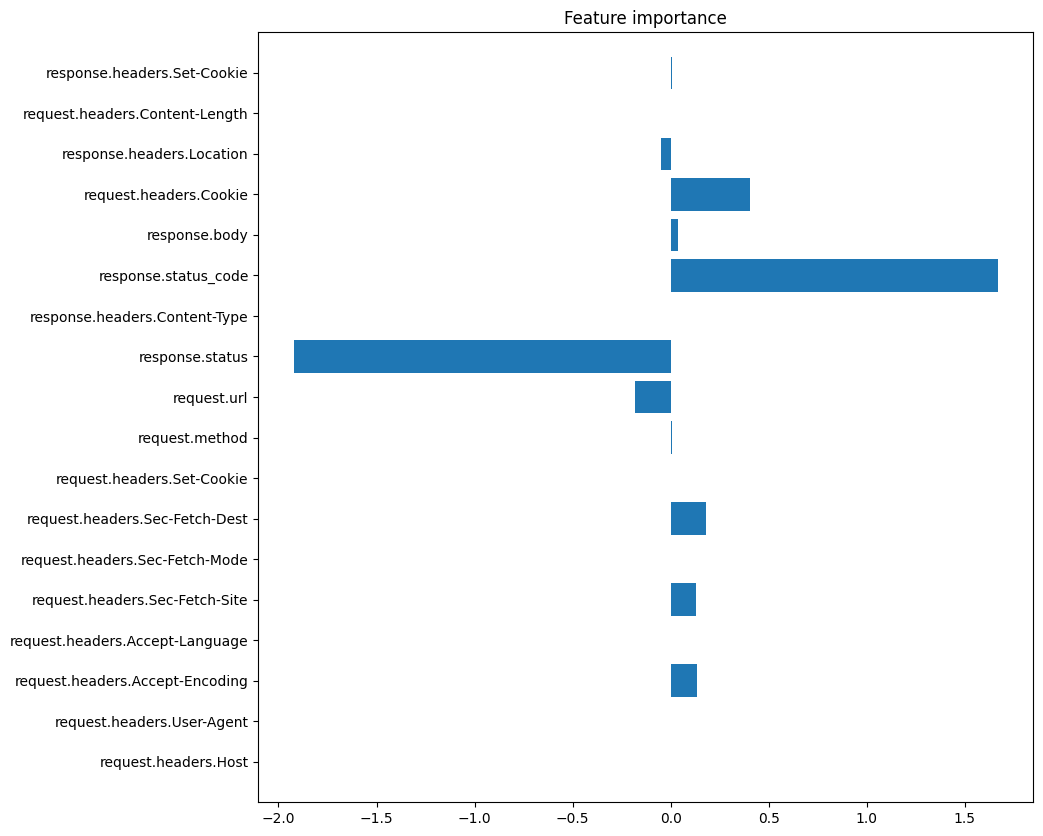

In [455]:
from sklearn.svm import LinearSVC

# Feature importance with Linear SVC
linear_svc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
linear_svc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importance")
plt.barh(range(x_train_pca.shape[1]), linear_svc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()

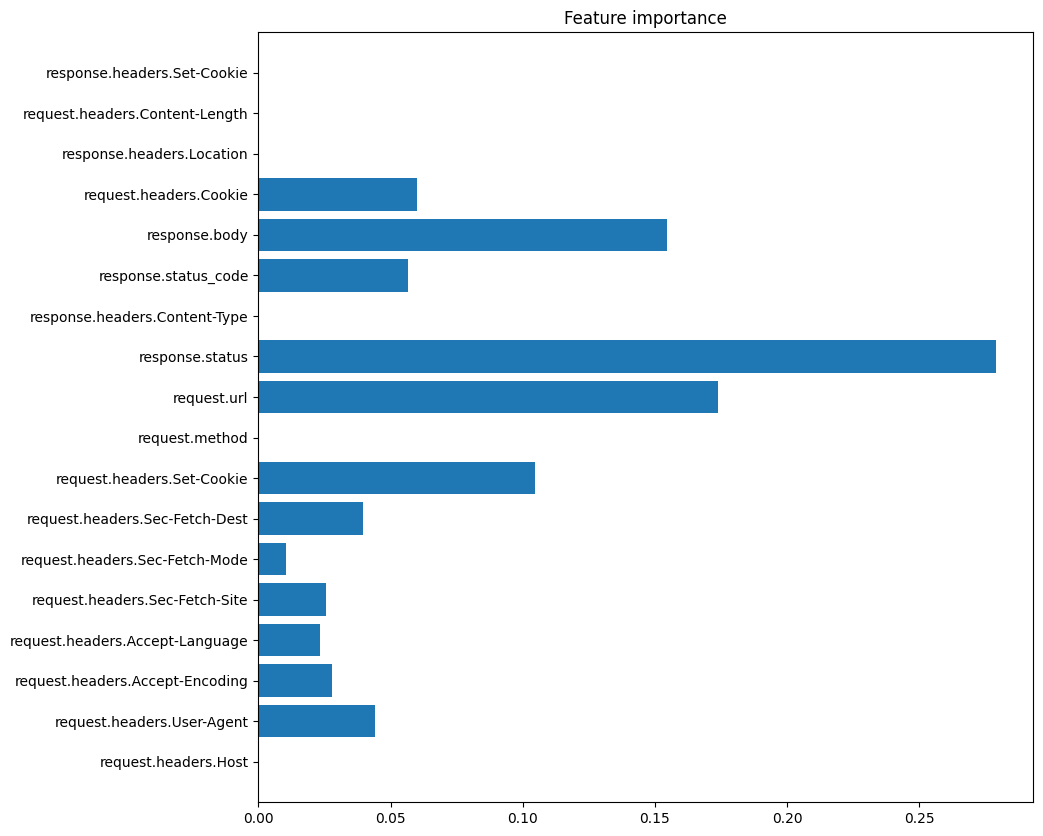

In [456]:
# Feature selection with Decision Tree Classifier
dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

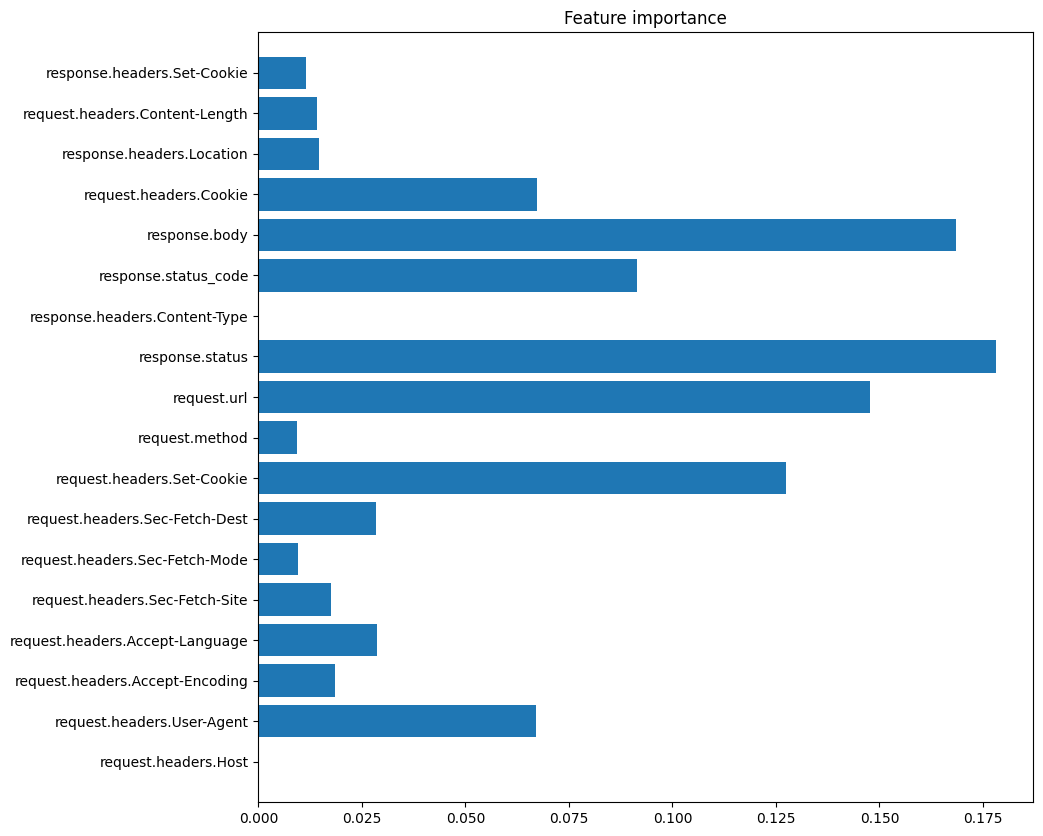

In [457]:
from sklearn.ensemble import ExtraTreesClassifier

# Feature selection with Extra Trees Classifier
etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [458]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature',
                                 'Random Forest',
                                 'AdaBoost',
                                 'Gradient Boosting',
                                 'Linear SVC',
                                 'Decision Tree',
                                 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_
fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(linear_svc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_
fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

C:\Users\moria\AppData\Local\Temp\ipykernel_18288\1497109417.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Random Forest,AdaBoost,Gradient Boosting,Linear SVC,Decision Tree,Extra Trees,Mean
10,response.status,0.155628,0.10,0.317642,1.923120,0.279180,0.178263,0.492305
12,response.status_code,0.138157,0.10,0.175329,1.669553,0.056443,0.091527,0.371835
9,request.url,0.182896,0.20,0.192172,0.181007,0.173912,0.147617,0.179601
13,response.body,0.155524,0.38,0.123382,0.034752,0.154585,0.168602,0.169474
14,request.headers.Cookie,0.045316,0.01,0.079570,0.403778,0.060056,0.067256,0.110996
7,request.headers.Set-Cookie,0.131813,0.17,0.002788,0.000000,0.104812,0.127421,0.089472
6,request.headers.Sec-Fetch-Dest,0.027921,0.01,0.043132,0.177921,0.039681,0.028503,0.054526
2,request.headers.Accept-Encoding,0.017887,0.01,0.029884,0.135646,0.027977,0.018431,0.039971
4,request.headers.Sec-Fetch-Site,0.018250,0.01,0.027686,0.129863,0.025411,0.017488,0.038116
1,request.headers.User-Agent,0.060500,0.00,0.000788,0.000000,0.044074,0.067019,0.028730


Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Optimal number of features: 8


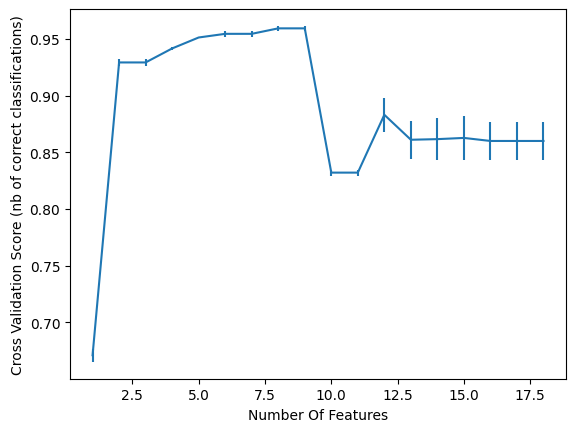

In [459]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score
recall_scorer = make_scorer(recall_score, pos_label='Malware')
rfecv = RFECV(estimator=LogisticRegression(),
              step=1,
              cv=StratifiedKFold(2),
              scoring=recall_scorer,
              verbose=1,
              n_jobs=-1)
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number Of Features")
plt.ylabel("Cross Validation Score (nb of correct classifications)")
plt.errorbar(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
             rfecv.cv_results_["mean_test_score"],
             yerr=rfecv.cv_results_["std_test_score"])
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [460]:
# Grid search to find the best hyperParameters for the model
def create_grid_search(model, params):
    return GridSearchCV(estimator=model,
                        param_grid=params,
                        scoring=recall_scorer,
                        n_jobs=1,
                        cv=3,
                        verbose=3,
                        return_train_score=True)

In [461]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):
    df = pd.DataFrame(results)
    
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build color scale
    color = np.zeros(len(df), dtype='uint8')
    color_scale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'],
                                           y=df['mean_test_score'],
                                           marker={'color': 'gray'},
                                           mode='markers',
                                           selected={'marker': {'color': 'blue'}},
                                           unselected={'marker': {'opacity': 0.3}}),
                                go.Parcats(domain={'y': [0, 0.4]},
                                           dimensions=dimensions,
                                           line={'colorscale': color_scale,
                                                 'cmin': 0,
                                                 'cmax': 1,
                                                 'color': color,
                                                 'shape': 'hspline'})])

    fig.update_layout(height=800,
                      xaxis={'title': 'STD Score'},
                      yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
                      dragmode='lasso',
                      hovermode='closest')

    # Update color callback
    def update_color(points):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

### Model Choosing & Fitting


#### Random Forest

Ensemble learning method that uses multiple decision trees to make predictions. 
It is a robust and flexible model that can handle high-dimensional and complex data,making it a good choice for API classification tasks.

In [462]:
rf = RandomForestClassifier()
rf_param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5],
}
rf_gcv = create_grid_search(rf, rf_param)
rf_gcv.fit(x_train_pca, y_train)

print("Best parameters:", rf_gcv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=gini, max_depth=3;, score=(train=0.969, test=0.957) total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3;, score=(train=0.965, test=0.963) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3;, score=(train=0.954, test=0.955) total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=5;, score=(train=0.965, test=0.958) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5;, score=(train=0.957, test=0.968) total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3;, score=(train=0.969, test=0.957) total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3;, score=(train=0.957, test=0.958) total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3;, score=(train=0.960, test=0.966) total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5;, score=(train=0.967, test=0.953) total t

In [463]:
# # Save the model
clf = rf_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
# pickle.dump(clf, open(filename, 'wb'))

#### SVM - Support Vector Machines 

Popular choice for classification tasks, including API classification. 
They work by finding the hyperplane in a high-dimensional space that maximally separates different classes of data points.

In [464]:
svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf", "sigmoid"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)
svc_gcv.fit(x_train_pca, y_train)

print("Best parameters:", svc_gcv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END C=1, kernel=poly, probability=True;, score=(train=0.963, test=0.952) total time=   0.5s
[CV 2/3] END C=1, kernel=poly, probability=True;, score=(train=0.959, test=0.960) total time=   0.5s
[CV 3/3] END C=1, kernel=poly, probability=True;, score=(train=0.956, test=0.965) total time=   0.4s
[CV 1/3] END C=1, kernel=rbf, probability=True;, score=(train=0.965, test=0.952) total time=   0.8s
[CV 2/3] END C=1, kernel=rbf, probability=True;, score=(train=0.961, test=0.960) total time=   0.7s
[CV 3/3] END C=1, kernel=rbf, probability=True;, score=(train=0.956, test=0.966) total time=   0.7s
[CV 1/3] END C=1, kernel=sigmoid, probability=True;, score=(train=0.967, test=0.957) total time=   0.6s
[CV 2/3] END C=1, kernel=sigmoid, probability=True;, score=(train=0.960, test=0.960) total time=   0.6s
[CV 3/3] END C=1, kernel=sigmoid, probability=True;, score=(train=0.960, test=0.971) total time=   0.5s
[CV 1/3] END C=2, kernel=

In [465]:
# # Save the model
svc = svc_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
# pickle.dump(svc, open(filename, 'wb'))

#### Logistic Regression

Simple yet effective linear model for classification tasks. 
It is particularly useful for predicting binary outcomes (e.g., malicious vs benign) and is often used as a baseline model for comparison with more complex models.

In [466]:
lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3, 4, 5],
    "penalty": ["l1", "l2"],
}
lr_gcv = create_grid_search(lr, lr_param)
lr_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(lr_gcv.cv_results_)
print("Best parameters:", lr_gcv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ...C=1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END ...C=1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END ...C=1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=1, penalty=l2;, score=(train=0.965, test=0.952) total time=   0.0s
[CV 2/3] END C=1, penalty=l2;, score=(train=0.961, test=0.960) total time=   0.0s
[CV 3/3] END C=1, penalty=l2;, score=(train=0.956, test=0.966) total time=   0.0s
[CV 1/3] END ...C=2, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END ...C=2, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END ...C=2, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=2, penalty=l2;, score=(train=0.965, test=0.952) total time=   0.0s
[CV 2/3] END C=2, penalty=l2;, score=(train=0.961, test=0.960) total time=   0.0s
[CV 3/3] END C=2, penalty=l2;, score=(train

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\moria\PycharmProjects\A

In [467]:
# # Save the model
lr = lr_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
# pickle.dump(lr, open(filename, 'wb'))

#### KNN

Simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
It is a non-parametric model that does not make any assumptions about the underlying data distribution.


In [468]:
knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [5, 9, 13],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)
knn_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(knn_gcv.cv_results_)
print("Best parameters:", knn_gcv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END n_neighbors=5, weights=uniform;, score=(train=0.579, test=0.564) total time=   0.0s
[CV 2/3] END n_neighbors=5, weights=uniform;, score=(train=0.962, test=0.958) total time=   0.0s
[CV 3/3] END n_neighbors=5, weights=uniform;, score=(train=0.955, test=0.965) total time=   0.0s
[CV 1/3] END n_neighbors=5, weights=distance;, score=(train=0.581, test=0.564) total time=   0.0s
[CV 2/3] END n_neighbors=5, weights=distance;, score=(train=0.965, test=0.958) total time=   0.0s
[CV 3/3] END n_neighbors=5, weights=distance;, score=(train=0.957, test=0.966) total time=   0.0s
[CV 1/3] END n_neighbors=9, weights=uniform;, score=(train=0.963, test=0.953) total time=   0.0s
[CV 2/3] END n_neighbors=9, weights=uniform;, score=(train=0.961, test=0.958) total time=   0.0s
[CV 3/3] END n_neighbors=9, weights=uniform;, score=(train=0.955, test=0.965) total time=   0.0s
[CV 1/3] END n_neighbors=9, weights=distance;, score=(train=0.96

In [469]:
# # Save the model
knn = knn_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
# pickle.dump(knn, open(filename, 'wb'))

#### Decision Trees

Popular choice for classification tasks.
They work by recursively partitioning the feature space into smaller and smaller regions, until each region contains only a single class of data points.


In [470]:
dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 7, 9],
}
dt_gcv = create_grid_search(dt, dt_param)
dt_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(dt_gcv.cv_results_)
print("Best parameters:", dt_gcv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=gini, max_depth=5;, score=(train=0.965, test=0.949) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5;, score=(train=0.961, test=0.957) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5;, score=(train=0.954, test=0.965) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=7;, score=(train=0.967, test=0.953) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=7;, score=(train=0.965, test=0.958) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=7;, score=(train=0.957, test=0.968) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=9;, score=(train=0.967, test=0.953) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=9;, score=(train=0.965, test=0.958) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=9;, score=(train=0.957, test=0.968) total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5;, score=(train=0.965, test=0.949) total time=   0.

In [471]:
# # Save the model
dt = dt_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
# pickle.dump(dt, open(filename, 'wb'))

#### AdaBoost

Popular ensemble method that works by combining the predictions of multiple weak learners.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.

In [472]:
abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [3, 5, 10],
    "learning_rate": [1, 100, 1000],
}
abc_gcv = create_grid_search(abc, abc_param)
abc_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(abc_gcv.cv_results_)
print("Best parameters:", abc_gcv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END learning_rate=1, n_estimators=3;, score=(train=0.938, test=0.936) total time=   0.0s
[CV 2/3] END learning_rate=1, n_estimators=3;, score=(train=0.931, test=0.950) total time=   0.0s
[CV 3/3] END learning_rate=1, n_estimators=3;, score=(train=0.943, test=0.926) total time=   0.0s
[CV 1/3] END learning_rate=1, n_estimators=5;, score=(train=0.952, test=0.947) total time=   0.0s
[CV 2/3] END learning_rate=1, n_estimators=5;, score=(train=0.948, test=0.955) total time=   0.0s
[CV 3/3] END learning_rate=1, n_estimators=5;, score=(train=0.944, test=0.942) total time=   0.0s
[CV 1/3] END learning_rate=1, n_estimators=10;, score=(train=0.967, test=0.955) total time=   0.0s
[CV 2/3] END learning_rate=1, n_estimators=10;, score=(train=0.965, test=0.960) total time=   0.0s
[CV 3/3] END learning_rate=1, n_estimators=10;, score=(train=0.957, test=0.973) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=3;, score=

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overf

In [473]:
# # Save the model
abc = abc_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
# pickle.dump(abc, open(filename, 'wb'))


#### Gradient Boosting

Popular ensemble method that works by combining the predictions of multiple weak learners.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [474]:
gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [3, 5, 10],
    "learning_rate": [0.001, 0.1],
}
gbc_gcv = create_grid_search(gbc, gbc_param)
gbc_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(gbc_gcv.cv_results_)
print("Best parameters:", gbc_gcv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END learning_rate=0.001, n_estimators=3;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=3;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=3;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END learning_rate=0.001, n_estimators=5;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=5;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=5;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END learning_rate=0.001, n_estimators=10;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=10;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=10;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END learni

In [475]:
# # Save the model
gbc = gbc_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
# pickle.dump(gbc, open(filename, 'wb'))

#### Neural Networks

popular choice for classification tasks.
They work by learning the weights of the connections between neurons in the network.

In [476]:
mlp = MLPClassifier()
mlp_param = {
    "activation": ["logistic"],
    "solver": ["sgd"],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)
mlp_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(mlp_gcv.cv_results_)
print("Best parameters:", mlp_gcv.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END activation=logistic, early_stopping=True, learning_rate=constant, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/3] END activation=logistic, early_stopping=True, learning_rate=constant, solver=sgd;, score=(train=0.989, test=0.992) total time=   0.3s
[CV 3/3] END activation=logistic, early_stopping=True, learning_rate=constant, solver=sgd;, score=(train=0.994, test=0.998) total time=   0.2s
[CV 1/3] END activation=logistic, early_stopping=True, learning_rate=invscaling, solver=sgd;, score=(train=0.026, test=0.040) total time=   0.3s
[CV 2/3] END activation=logistic, early_stopping=True, learning_rate=invscaling, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/3] END activation=logistic, early_stopping=True, learning_rate=invscaling, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/3] END activation=logistic, early_stopping=True, learning_rate=adaptive

In [477]:
# # Save the model
mlp = mlp_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
# pickle.dump(mlp, open(filename, 'wb'))

#### Voting Classifier

Meta-classifier that combines the predictions of multiple classifiers.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [478]:
vc = VotingClassifier(estimators=[("clf",clf),
                                  ("svc",svc),
                                  ("lr",lr),
                                  ("knn",knn),
                                  ("dt",dt),
                                  ("abc",abc),
                                  ("gbc",gbc),
                                  ("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1],
                [7,1,1,1,1,1,1,1],
                [1,7,1,1,1,1,1,1],
                [1,1,7,1,1,1,1,1],
                [1,1,1,7,1,1,1,1],
                [1,1,1,1,7,1,1,1],
                [1,1,1,1,1,7,1,1],
                [1,1,1,1,1,1,7,1],
                [1,1,1,1,1,1,1,7]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)
vc_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(vc_gcv.cv_results_)
print("Best parameters:", vc_gcv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.969, test=0.957) total time=   1.2s
[CV 2/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.965, test=0.963) total time=   1.2s
[CV 3/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.959, test=0.968) total time=   1.2s
[CV 1/3] END voting=hard, weights=[7, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.960, test=0.950) total time=   1.3s
[CV 2/3] END voting=hard, weights=[7, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.965, test=0.963) total time=   1.5s
[CV 3/3] END voting=hard, weights=[7, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.959, test=0.966) total time=   1.7s
[CV 1/3] END voting=hard, weights=[1, 7, 1, 1, 1, 1, 1, 1];, score=(train=0.967, test=0.955) total time=   1.5s
[CV 2/3] END voting=hard, weights=[1, 7, 1, 1, 1, 1, 1, 1];, score=(train=0.963, test=0.963) total time=   1.4s
[CV 3/3] END voting=hard, weights=[1, 7, 1,

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_base.py:46: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_base.py:46: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\U

In [479]:
# # Save the model
vc = vc_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
# pickle.dump(vc, open(filename, 'wb'))

#### Stacking Classifier

Meta-classifier that combines the predictions of multiple classifiers.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [480]:
sc = StackingClassifier(estimators=[("clf",clf),
                                    ("svc",svc),
                                    ("lr",lr),
                                    ("knn",knn),
                                    ("dt",dt),
                                    ("abc",abc),
                                    ("gbc",gbc),
                                    ("mlp",mlp)],
                        final_estimator=LogisticRegression())
sc_param = {"final_estimator__C": [0, 1, 2, 3],
            "cv": ["prefit", None]}
sc_gcv = create_grid_search(sc, sc_param)
sc_gcv.fit(x_train_pca, y_train)

# plot_grid_search_results(sc_gcv.cv_results_)
print("Best parameters:", sc_gcv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END cv=prefit, final_estimator__C=0;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END cv=prefit, final_estimator__C=0;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END cv=prefit, final_estimator__C=0;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END cv=prefit, final_estimator__C=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END cv=prefit, final_estimator__C=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END cv=prefit, final_estimator__C=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END cv=prefit, final_estimator__C=2;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END cv=prefit, final_estimator__C=2;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END cv=prefit, final_estimator__C=2;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END cv=prefit, final_estimator__C=3;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_base.py:46: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encountered in exp

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\model_selection\_validation.py:1050: UserWarning:

Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning:

overflow encounter

In [481]:
# # Save the model
sc = sc_gcv.best_estimator_
# filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
# pickle.dump(sc, open(filename, 'wb'))

### Choose The Best Model


In [482]:
models = [clf, svc, lr, knn, dt, abc, gbc, mlp, vc, sc]

model_names = ["Random Forest",
               "SVM",
               "Logistic Regression",
               "KNN",
               "Decision Tree",
               "AdaBoost",
               "Gradient Boosting",
               "Neural Network",
               "Voting Classifier",
               "Stacking Classifier"]

model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\metrics\_classification.py:1344

#### Result

In [483]:
best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)

print("Best model:", best_model_name)
print("Score:", str(best_model_score))

model_report = classification_report(true_labels, predictions, digits=5)

print(model_report)

Best model: Logistic Regression
Score: 0.82979
              precision    recall  f1-score   support

      Benign    0.95370   0.57865   0.72028       356
     Malware    0.72222   0.97500   0.82979       400

    accuracy                        0.78836       756
   macro avg    0.83796   0.77683   0.77503       756
weighted avg    0.83123   0.78836   0.77822       756



## Test


In [484]:
# Read the valuation json
# Preprocess data & run model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset
# Remove / Replace NAN columns
for column in test_df.columns[test_df.isna().any()].tolist():
    test_df[column] = test_df[column].fillna('None')
    
test_df = vectorize_df(test_df)

x = test_df[features_list].to_numpy()
x = ss.transform(x)
x = rfecv.transform(x)
pred_ = vc.predict(x)

C:\Users\moria\PycharmProjects\API_Security_Research\venv\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [485]:
# Save your predictions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt',
           enc.fit_transform(pred_), fmt='%2d')